In [ ]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import numpy as np
import mediapipe

In [7]:
gestures = {}

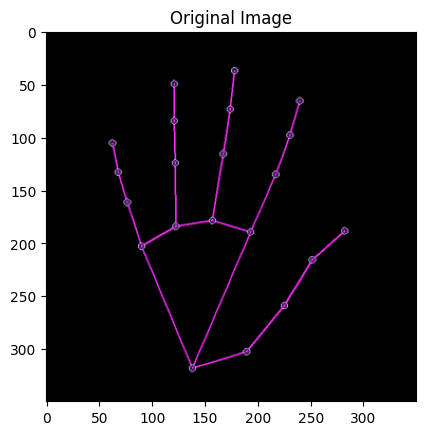

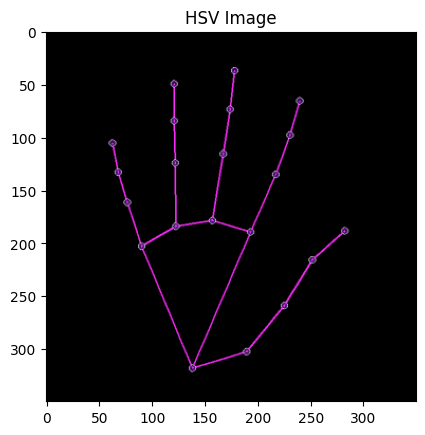

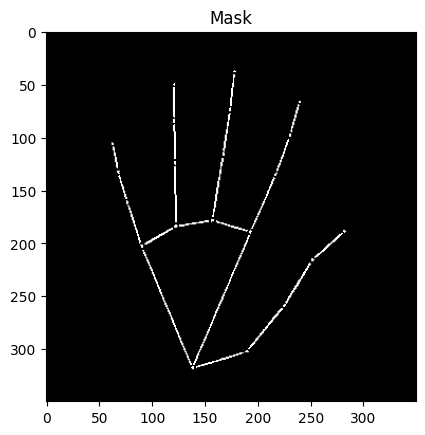

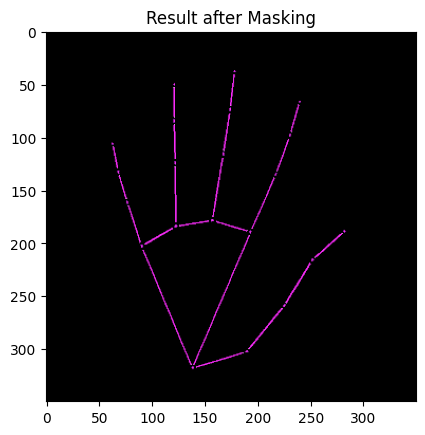

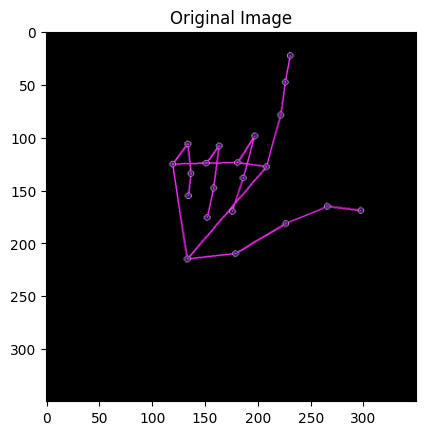

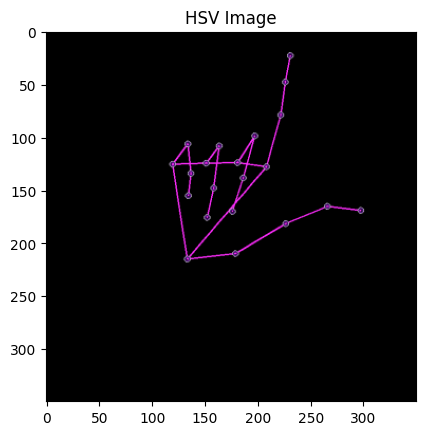

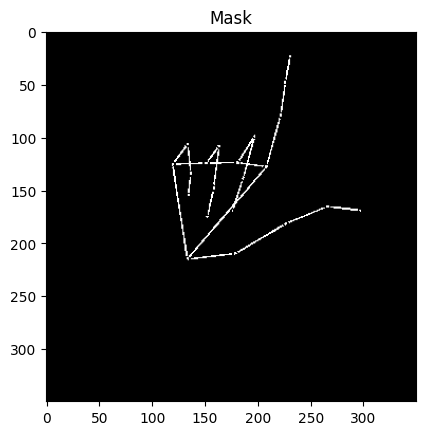

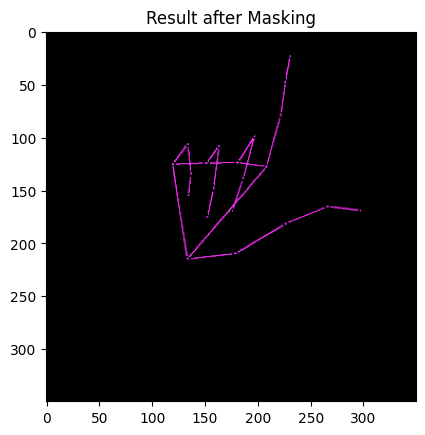

(414, 32)
The gestures are not similar.


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

def preprocess_image(image_path, show_steps=True):
    # Load image
    img = cv2.imread(image_path)
    if show_steps:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.show()

    # Convert to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if show_steps:
        plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
        plt.title("HSV Image")
        plt.show()

    # Define pink color range and create mask
    lower_pink = np.array([140, 100, 100])
    upper_pink = np.array([170, 255, 255])
    mask = cv2.inRange(hsv_img, lower_pink, upper_pink)
    if show_steps:
        plt.imshow(mask, cmap='gray')
        plt.title("Mask")
        plt.show()

    # Apply mask
    result = cv2.bitwise_and(img, img, mask=mask)
    if show_steps:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Result after Masking")
        plt.show()

    return result

def match_gestures(image1_path, image2_path, threshold=120, show_preprocess_steps=True):
    img1 = preprocess_image(image1_path, show_steps=show_preprocess_steps)
    img2 = preprocess_image(image2_path, show_steps=show_preprocess_steps)
    
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    print(des2.shape)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    if len(matches) > threshold:
        print("The gestures are similar.")
    else:
        print("The gestures are not similar.")

    return des2

# Example usage (paths need to be valid image paths for actual execution)
image1_path = 'saved_imgs/cropped_hand_22.png'
image2_path = 'saved_imgs/bumper_base.png'
des2 = match_gestures(image1_path, image2_path, show_preprocess_steps=True)

gestures["bumper"] = des2.tolist()




In [14]:
for val in gestures:
    print(val, gestures[val])

speed_inc [[120, 48, 9, 164, 3, 88, 80, 0, 36, 64, 130, 136, 215, 22, 0, 242, 160, 213, 248, 1, 13, 2, 213, 0, 211, 227, 136, 17, 40, 8, 14, 18], [104, 34, 17, 32, 33, 73, 64, 0, 97, 72, 48, 104, 143, 6, 128, 176, 128, 17, 196, 0, 13, 96, 128, 0, 130, 209, 32, 17, 64, 128, 74, 1], [69, 96, 145, 68, 0, 104, 0, 0, 96, 194, 32, 8, 18, 54, 65, 58, 0, 84, 96, 2, 1, 100, 160, 0, 1, 168, 65, 0, 192, 113, 6, 32], [68, 160, 56, 96, 128, 9, 17, 5, 34, 181, 37, 25, 2, 7, 74, 18, 1, 20, 65, 16, 18, 64, 136, 16, 73, 129, 21, 101, 192, 0, 134, 34], [69, 112, 145, 68, 0, 104, 0, 0, 96, 194, 32, 8, 18, 54, 65, 58, 0, 84, 80, 18, 1, 100, 176, 0, 1, 168, 69, 0, 200, 113, 2, 48], [98, 32, 2, 24, 72, 137, 128, 72, 142, 0, 128, 8, 132, 192, 32, 80, 128, 32, 106, 1, 0, 3, 130, 16, 16, 32, 9, 56, 16, 0, 3, 0], [98, 32, 129, 36, 32, 72, 64, 0, 105, 224, 162, 168, 135, 4, 208, 182, 128, 213, 108, 17, 13, 66, 228, 0, 136, 240, 13, 50, 64, 0, 7, 36], [97, 7, 4, 4, 52, 10, 70, 48, 96, 8, 58, 72, 67, 32, 144, 18, 

In [15]:
#write binary feature vectors to json
json_object = json.dumps(gestures)

# Write the JSON string to a file
with open("base_gestures_2.json", "w") as outfile:
    outfile.write(json_object)

In [48]:
#retrieve
with open("base_gestures.json", "r") as infile:
    data = json.load(infile)

# Access the 'speed' key to get the list of descriptors
des2_list = data["speed_inc"]

# Convert the list back into a NumPy array
des2_retrieved = np.array(des2_list)
print(des2_retrieved)

[[118  32 245 ... 112   5  36]
 [ 64  34  49 ... 128  87 161]
 [  0  32  68 ... 128  18 128]
 ...
 [ 64  32   2 ...   4   3 129]
 [104   4  64 ... 164  82   0]
 [ 98  14 109 ... 172  86  92]]
